Problem 1 (10 points):

In this problem, you will create an artificial data set using one of the NumPy random functions and present the data in a single-panel figure. You are free to decide how to implement this task, provided you meet the basic requirements below. Insightful high quality plots will receive higher marks. 

The basic requirements include:
1. Draw at least 300 points from a random number generator (your choice)
2. Create a histogram of this data
3. Add annotation to indicate the mean and median of the distribution.

Solution 
 
FIG  1- A Histogram with KDE (Normal Distribution), displaying the MEAN, MEDIAN, STD DEV.

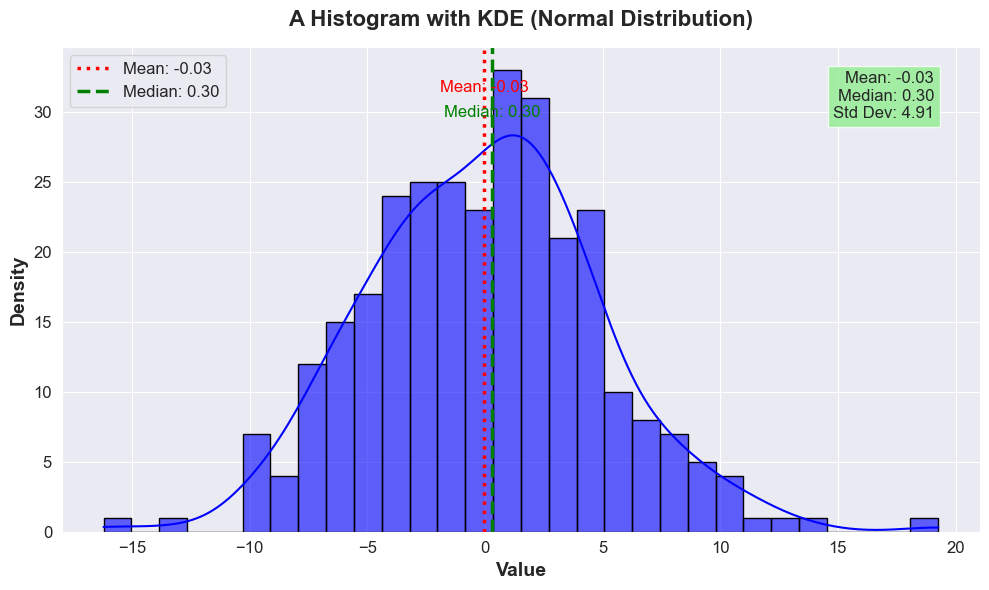

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Seaborn style for a polished look
sns.set_style("darkgrid")

# Generate 300 random data points from a normal distribution
np.random.seed(42)
data = np.random.normal(loc=0, scale=5, size=300)

# Create a histogram with KDE overlay
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True, color='blue', edgecolor='black', alpha=0.6)

# Calculate mean, median, and standard deviation
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)

# Add vertical lines for mean and median with different styles
plt.axvline(mean, color='red', linestyle='dotted', linewidth=2.5, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2.5, label=f'Median: {median:.2f}')

# Add annotations for mean and median
plt.text(mean, plt.ylim()[1] * 0.9, f'Mean: {mean:.2f}', color='red', fontsize=12, ha='center', va='bottom')
plt.text(median, plt.ylim()[1] * 0.85, f'Median: {median:.2f}', color='green', fontsize=12, ha='center', va='bottom')

# Add a text box with key statistics
stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nStd Dev: {std_dev:.2f}"
plt.text(0.95, 0.95, stats_text, fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.8), 
         transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')

# Add labels, title, and legend
plt.xlabel('Value', fontsize=14,fontweight='bold')
plt.ylabel('Density', fontsize=14,fontweight='bold')
plt.title('A Histogram with KDE (Normal Distribution)', fontsize=16, fontweight='bold', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot & adjust subplot parameters to fit
plt.tight_layout() 
plt.show()

This Figure 1,  is to visualize the number of students in a primary school in Nigeria and also to visualize the number of pupils who eat 2 square meals a day. With Mean at -0.03, median at 0.30 and Standard Deviation at 4.91.

Problem 2 (10 points):

Load data from the following parquet file (URL below) into Python. Make elegant plots presenting the data as thoroughly as possible. 

I have deliberately not included more information about the content of the dataset or how best to present the data because this is up to you to figure out! You will be marked on your creativity and the appropriateness of your data presentation choices. To fully present the data, you may need to make multiple plots. 


START- Solution 2

In [172]:
#This loads the Dataset
url = 'https://star.herts.ac.uk/~kuhn/DHV/exercises_problem2.parquet'
df = pd.read_parquet(url)

#This displays basic information
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    400 non-null    float64
 1   var2    400 non-null    float64
 2   var3    400 non-null    float64
 3   class   400 non-null    int16  
dtypes: float64(3), int16(1)
memory usage: 10.3 KB


In [174]:
#Displays head and tail of Dataset
df.describe() 
df

,var1,var2,var3,class
0,2.220386,3.088938,5.309324,1
1,-1.112359,1.838144,0.725785,0
2,-0.687695,1.747231,1.059535,0
3,-2.875016,1.718303,-1.156714,0
4,-2.010930,1.327895,-0.683035,0
...,...,...,...,...
395,8.812375,2.587172,11.399547,0
396,6.166092,2.921566,9.087658,1
397,5.039676,3.073661,8.113337,1
398,6.300243,2.734210,9.034453,1


Please note the difference between 'df.describe()'
'df.describe() df', which shows different information from the Dataset.

In [177]:
#Summary statistics
df.describe()

,var1,var2,var3,class
count,400.000000,400.000000,400.000000,400.000000
mean,3.469246,2.576392,6.045638,0.627500
std,3.811159,0.533500,4.219296,0.484076
min,-5.577154,0.444386,-5.132768,0.000000
25%,0.068847,2.346191,2.419225,0.000000
50%,4.968903,2.708548,7.961119,1.000000
75%,7.025826,2.951366,9.840901,1.000000
max,9.425215,3.471373,12.048517,1.000000


In [179]:
#List of column names
print(df.columns) 

#Data types of each column
print(df.dtypes)  


Index(['var1', 'var2', 'var3', 'class'], dtype='object')
var1     float64
var2     float64
var3     float64
class      int16
dtype: object


SOLUTION 2.1
These are  Subplots of the distributions in Columns named Variable 1, 2 and 3. It also displays the mean and median for each distribution. 
Also please note the Textbox had to be aligned to not obstruct any charts or display.

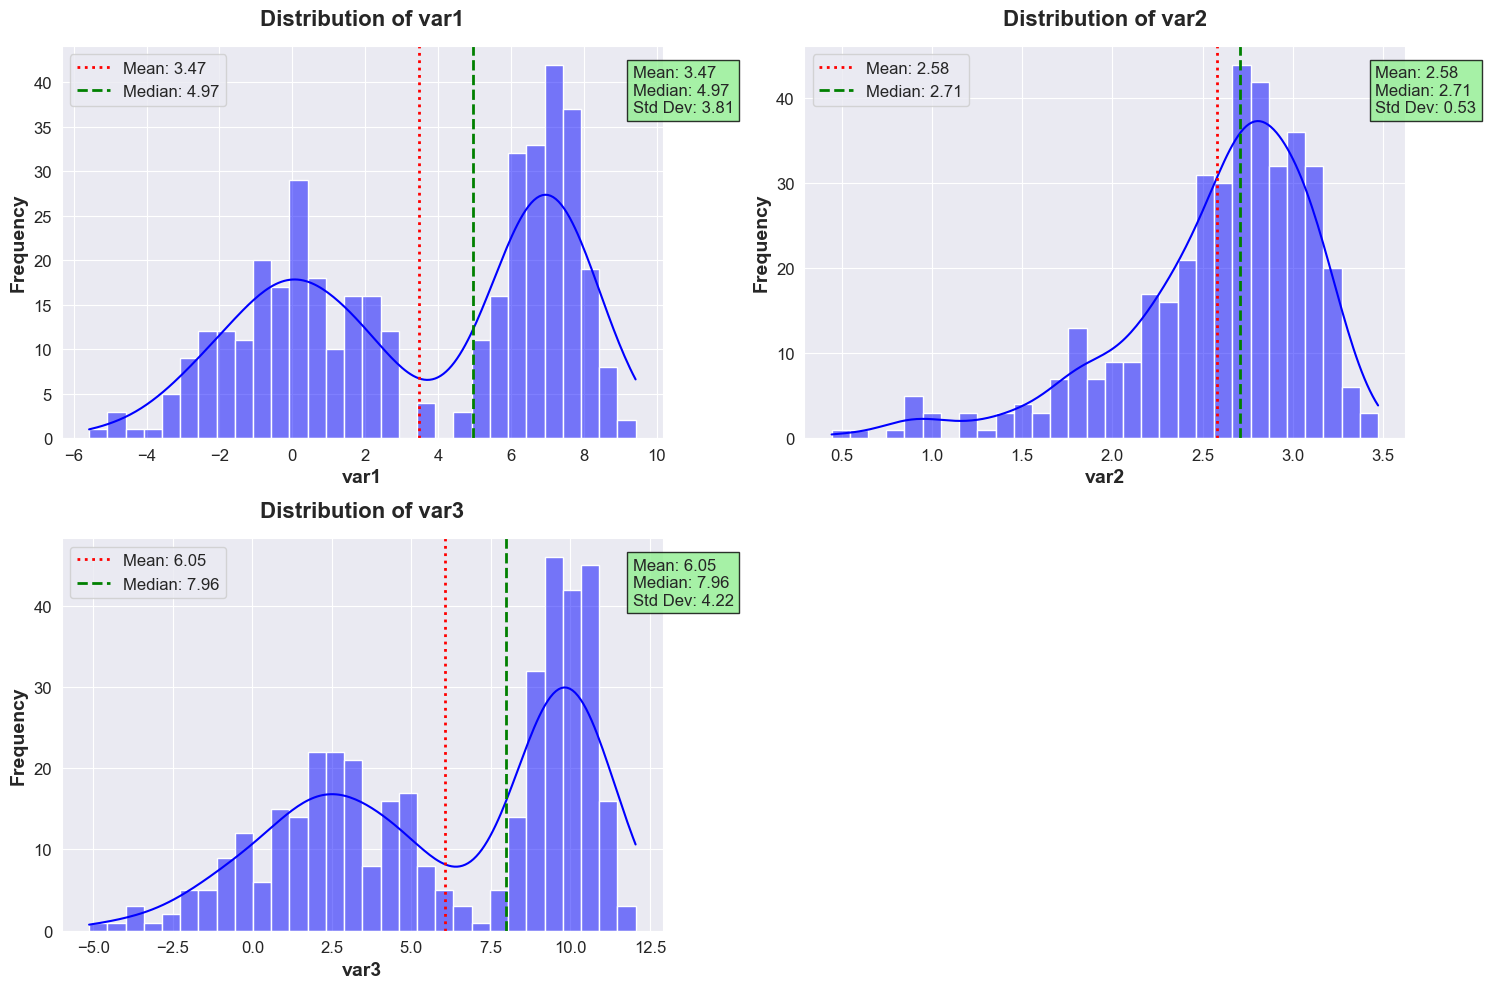

In [182]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for subplots
n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Create the figure and subplots
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    
    # Calculate mean, median, and standard deviation
    mean = df[col].mean()
    median = df[col].median()
    std_dev = df[col].std()
    
    # Add mean and median lines
    plt.axvline(mean, color='red', linestyle='dotted', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    
    # Add a text box with key statistics
    stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nStd Dev: {std_dev:.2f}"
    plt.text(0.95, 0.95, stats_text, fontsize=12, 
             bbox=dict(facecolor='lightgreen', edgecolor='black', alpha=0.8),  # Custom text box color
             transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='left')
    
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel(col, fontsize=14,fontweight='bold')
    plt.ylabel('Frequency', fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

This histograms shows the distributions in Var 1, Var 2 and Var 3, Also showing the Central Tendency.

SOLUTION 2.2
This is a Boxplot of the distributions in Columns named Variable 1, 2 and 3. It also displays the key statistics . 


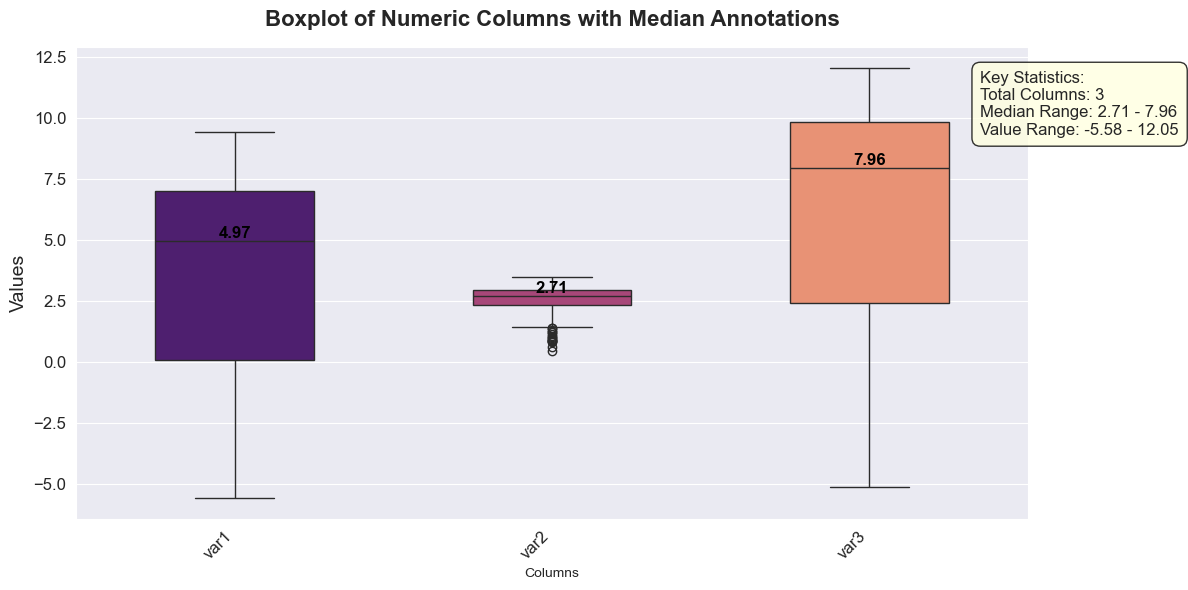

In [188]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Melt the DataFrame into long-form for Seaborn
df_melted = df[numeric_columns].melt(var_name='Columns', value_name='Values')

# Create the boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_melted, x='Columns', y='Values', hue='Columns', palette='magma', width=0.5, legend=False)

# Add median annotations
for i, col in enumerate(numeric_columns):
    median = df[col].median()
    ax.text(i, median, f'{median:.2f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Add a text box with key statistics
text_box = (
    "Key Statistics:\n"
    f"Total Columns: {len(numeric_columns)}\n"
    f"Median Range: {df[numeric_columns].median().min():.2f} - {df[numeric_columns].median().max():.2f}\n"
    f"Value Range: {df[numeric_columns].values.min():.2f} - {df[numeric_columns].values.max():.2f}"
)
plt.text(0.95, 0.95, text_box, fontsize=12, 
         bbox=dict(facecolor='lightyellow', edgecolor='black', alpha=0.8, boxstyle='round,pad=0.5'), 
         transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='left')

# Add title and labels
plt.title('Boxplot of Numeric Columns with Median Annotations', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate x-axis labels and align them to the right
plt.yticks(fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

SOLUTION 2.3

These are  Pairplot relationships of Columns Variable 1, 2 and 3. 

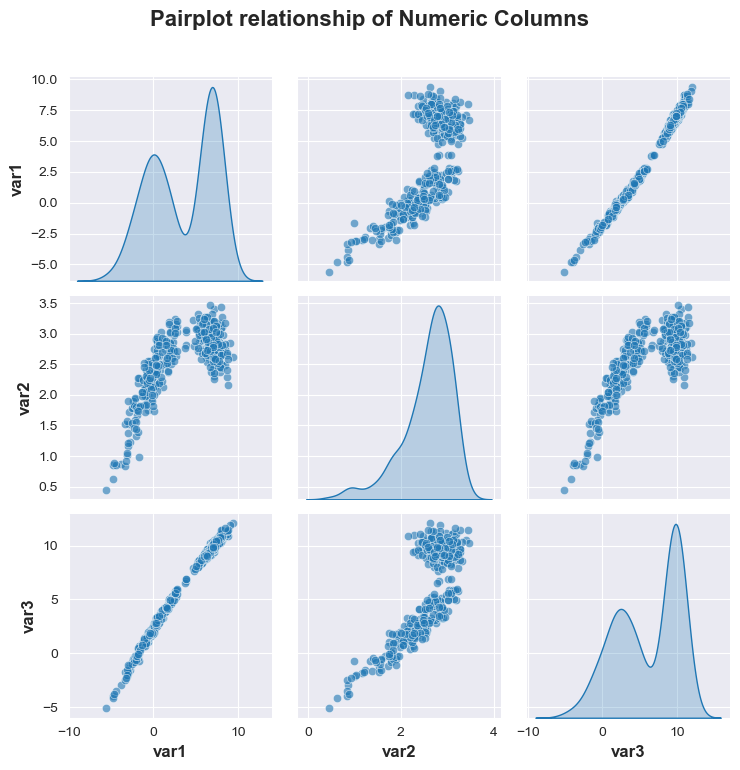

In [194]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Check if there are at least 2 numeric columns for a pairplot
if len(numeric_columns) > 1:
    # Create the pairplot
    pairplot = sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
    
    # Add a title to the pairplot
    plt.suptitle('Pairplot relationship of Numeric Columns', y=1.02, fontsize=16, fontweight='bold')
    
    # Customize axis labels for all subplots
    for ax in pairplot.axes.flat:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12,fontweight='bold')
        ax.set_ylabel(ax.get_ylabel(), fontsize=12,fontweight='bold')
        ax.tick_params(axis='both', labelsize=10)
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()
else:
    print("Pairplot requires at least 2 numeric columns.")

SOLUTION 2.4

A Historgram vs Boxplot of the Dataset, with enhanced visualization using fontweight and size.

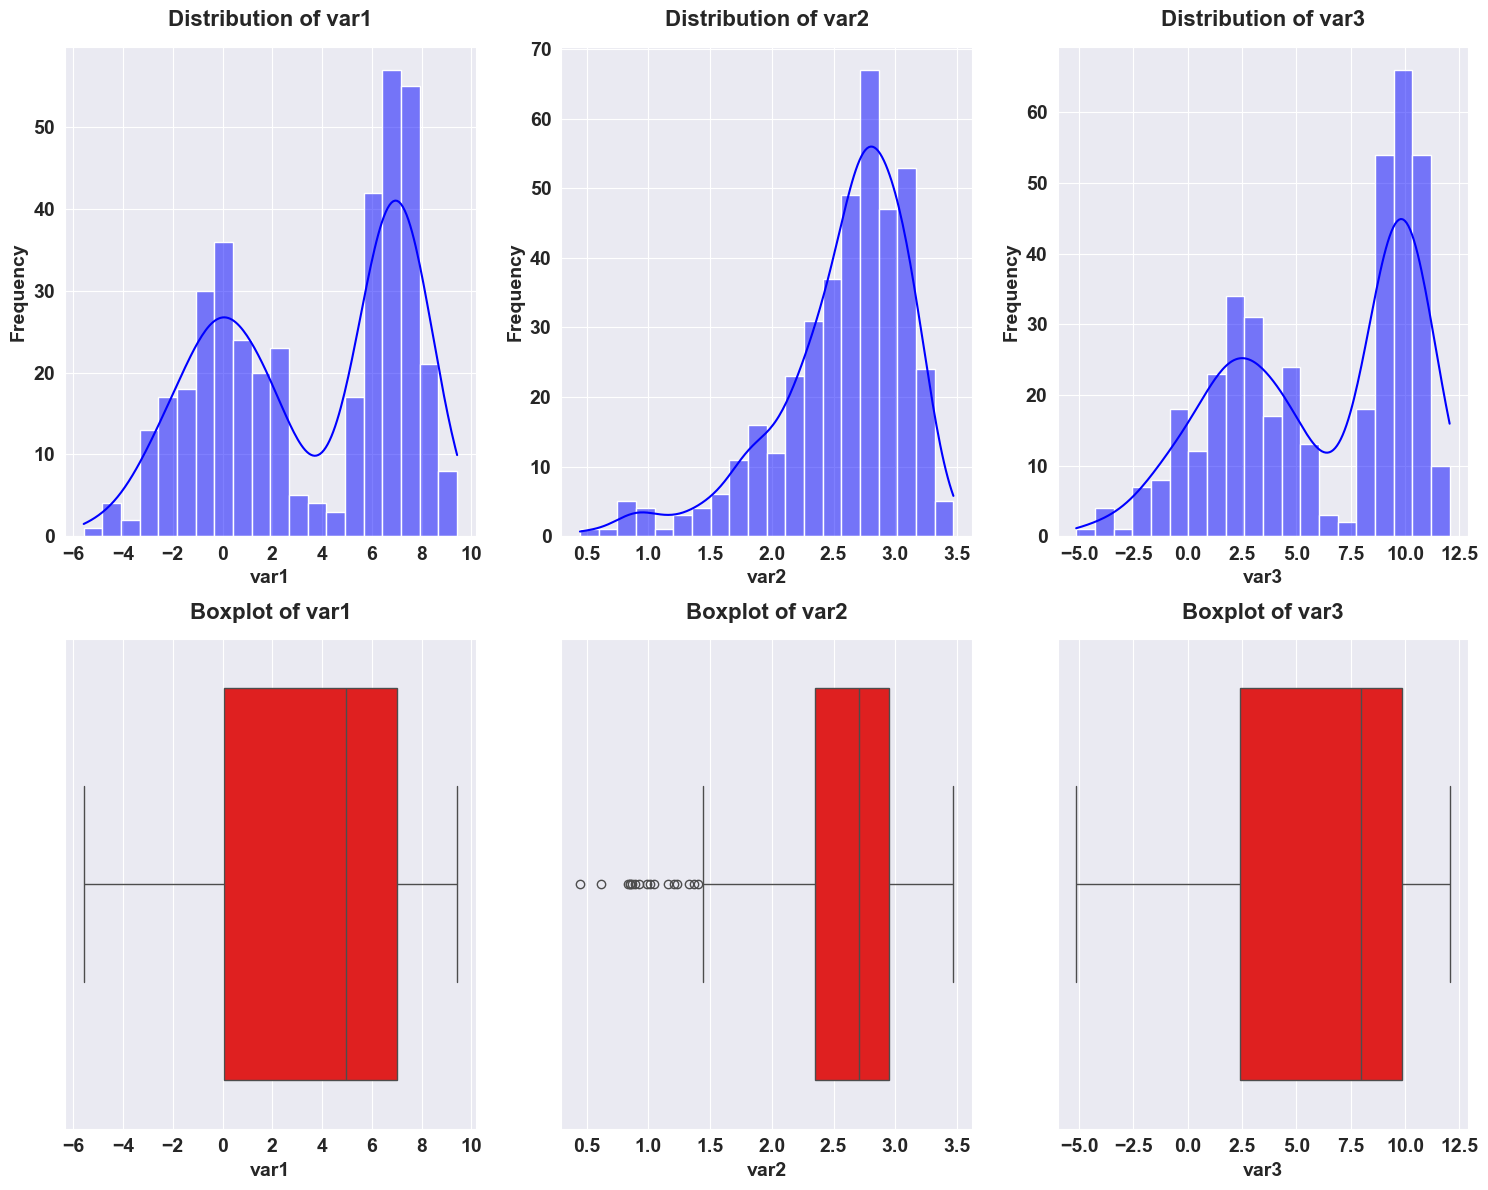

In [198]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up a larger figure size
plt.figure(figsize=(15, 12))

# Loop through numeric columns and create both histograms and boxplots
for i, col in enumerate(numeric_columns, 1):
    # Histogram with KDE
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel(col, fontsize=14,fontweight='bold')
    plt.ylabel('Frequency', fontsize=14,fontweight='bold')
    plt.xticks(fontsize=14,fontweight='bold')
    plt.yticks(fontsize=14,fontweight='bold')

    
    # Boxplot below the histogram 
    plt.subplot(2, 3, len(numeric_columns) + i)
    sns.boxplot(x=df[col], color='red')
    plt.title(f'Boxplot of {col}', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel(col, fontsize=14,fontweight='bold')
    plt.xticks(fontsize=14,fontweight='bold')
    plt.yticks(fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()


SOLUTION 2.5

A Heatmap of the Dataset, showing a relationship between variables.

<function matplotlib.pyplot.show(close=None, block=None)>

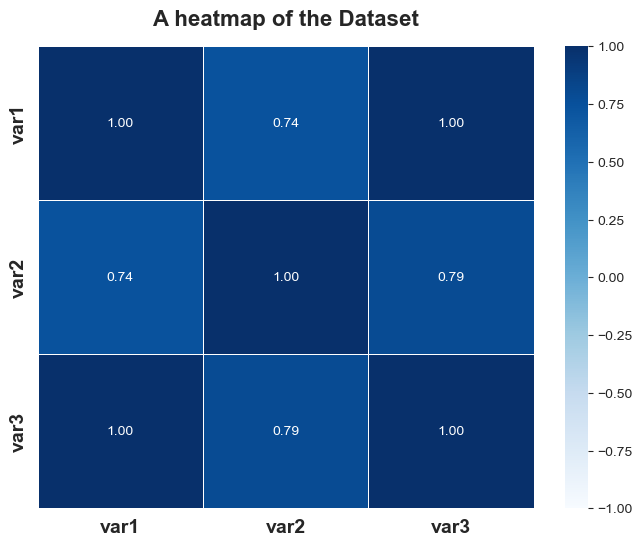

In [201]:
#heatmap
corr_matrix = df[['var1','var2', 'var3']]. corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, )
plt.title('A heatmap of the Dataset', fontsize=16, fontweight='bold', pad=15)
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')

plt.show

SOLUTION 2.6

A Scatter Plot with a Regression Line.

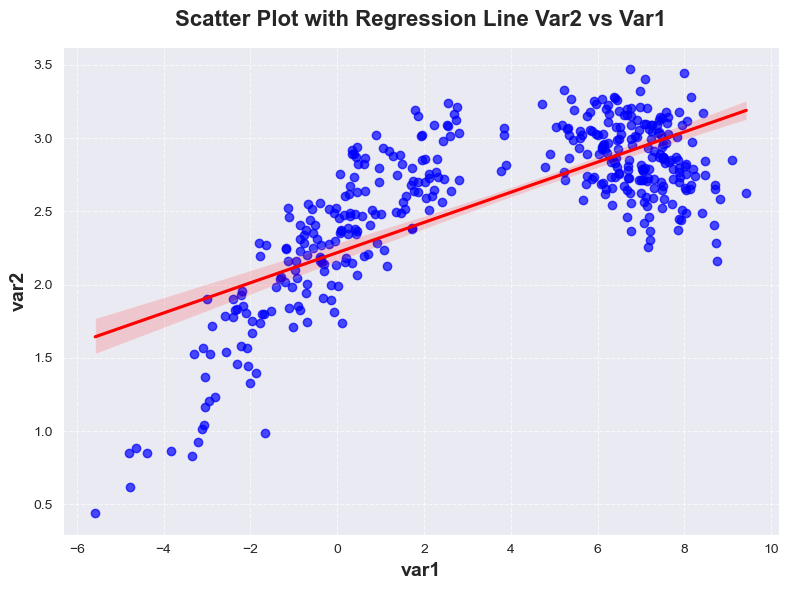

In [204]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='var1', y='var2', scatter_kws={'alpha': 0.7, 'color': 'blue'}, 
            line_kws={'color': 'red'})

# Add title and labels
plt.title('Scatter Plot with Regression Line Var2 vs Var1', fontsize=16, fontweight='bold', pad=15 )
plt.xlabel('var1', fontsize=14,fontweight='bold')
plt.ylabel('var2', fontsize=14, fontweight='bold')

# Customize grid and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

SOLUTION 2.7

A Scatterplot of the Dataset, showing the relationship between Variables 1 and 3

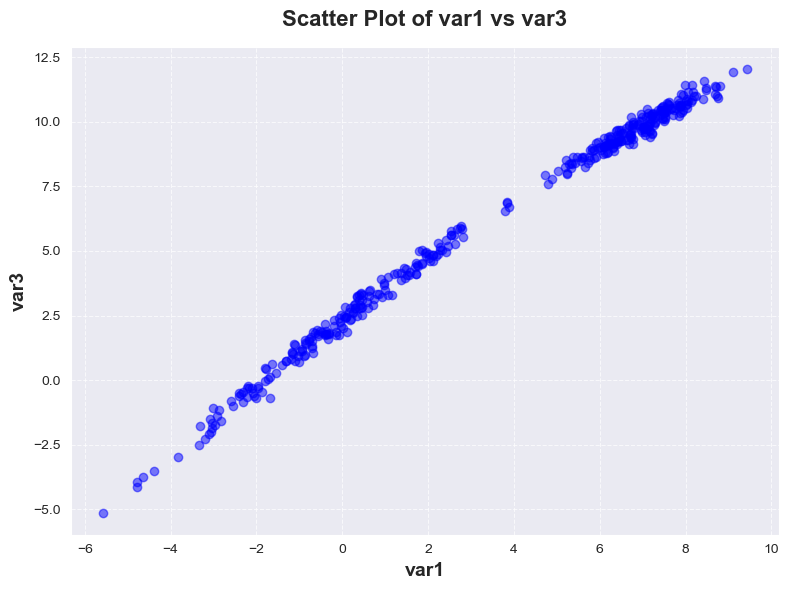

In [207]:
#A scatter plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(df['var1'], df['var3'], alpha=0.5, color='blue')

# Add title and labels
plt.title('Scatter Plot of var1 vs var3', fontsize=16, fontweight='bold', pad=15 )
plt.xlabel('var1', fontsize=14, fontweight='bold')
plt.ylabel('var3', fontsize=14,fontweight='bold')

# Customize grid and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The End